In [18]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
PLOT_FOLDER = "../data/processed/plots/"


In [19]:
df = pd.read_csv('../data/processed/movie_stats/movie_stats_clustered.csv')

In [20]:
df

,Unnamed: 0,movie_name,imdb_id,release_date,cast,direction,production_companies,movie_budget,movie_revenue,film_series,film_series_cluster,cast_similarity
0,0,The Marvels,tt10676048,2023-11-08,{'Brie Larson': 'Carol Danvers / Captain Marve...,['Nia DaCosta'],"['Marvel Studios', 'Kevin Feige Productions']",274800000,108998133,0,9,1.000000
1,1,Guardians of the Galaxy Vol. 3,tt6791350,2023-05-03,"{'Chris Pratt': 'Peter Quill / Star-Lord', 'Zo...",['James Gunn'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,845430302,9,2,0.823059
2,2,Spider-Man: No Way Home,tt10872600,2021-12-15,"{'Tom Holland': 'Peter Parker / Spider-Man', '...",['Jon Watts'],"['Marvel Studios', 'Pascal Pictures', 'Columbi...",200000000,1921847111,5,7,0.549519
3,3,Avengers: Infinity War,tt4154756,2018-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...","['Anthony Russo', 'Joe Russo']",['Marvel Studios'],300000000,2052415039,6,1,0.779569
4,4,Ant-Man and the Wasp: Quantumania,tt10954600,2023-02-15,"{'Paul Rudd': 'Scott Lang / Ant-Man', 'Evangel...",['Peyton Reed'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,476071180,4,4,0.546267
5,5,Black Panther: Wakanda Forever,tt9114286,2022-11-09,"{'Letitia Wright': 'Shuri / Black Panther', ""L...",['Ryan Coogler'],['Marvel Studios'],250000000,859102154,3,10,0.257418
6,6,Thor: Love and Thunder,tt10648342,2022-07-06,"{'Chris Hemsworth': 'Thor Odinson', 'Natalie P...",['Taika Waititi'],"['Marvel Studios', 'Kevin Feige Productions']",250000000,760928081,2,3,0.426771
7,7,The Avengers,tt0848228,2012-04-25,"{'Robert Downey Jr.': 'Tony Stark / Iron Man',...",['Joss Whedon'],['Marvel Studios'],220000000,1518815515,6,1,1.000000
8,8,Captain Marvel,tt4154664,2019-03-06,{'Brie Larson': 'Carol Danvers / Vers / Captai...,"['Ryan Fleck', 'Anna Boden']",['Marvel Studios'],152000000,1131416446,0,9,1.000000
9,9,Doctor Strange in the Multiverse of Madness,tt9419884,2022-05-04,{'Benedict Cumberbatch': 'Dr. Stephen Strange ...,['Sam Raimi'],"['Marvel Studios', 'Kevin Feige Productions']",200000000,955775804,7,8,0.612654


f(x) = 6.88x + -424228292.96


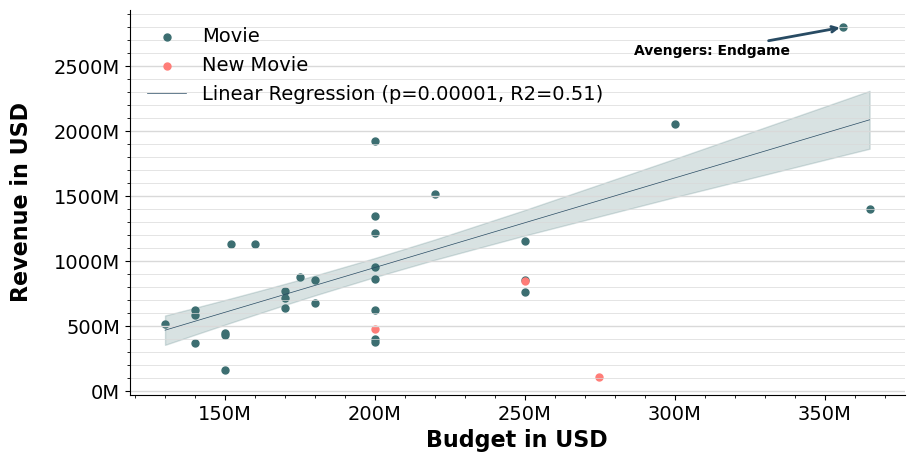

In [21]:
from matplotlib.ticker import MultipleLocator

# sorting df by budget
df = df.sort_values(by=['movie_budget'])
cut_date = '2023-01-01'

# filtering out movie that is less than a year old
df1 = df[df['release_date'] < cut_date]

x = df1['movie_budget']
y = df1['movie_revenue']


# plotting budget vs revenue
plt.figure(figsize=(10, 5))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.gca().xaxis.set_minor_locator(MultipleLocator(10_000_000))
plt.gca().yaxis.set_minor_locator(MultipleLocator(100_000_000))

plt.gca().grid(True, axis='y', which='major', linestyle='-', c='#d9d9d9', lw=1)
plt.gca().grid(True, axis='y', which='minor', linestyle='-', c='#d9d9d9', lw=0.5)

plt.scatter(x, y, c='#3c6e71', s=25, marker='o', label='Movie')

df2 = df[df['release_date'] >= cut_date]
x1 = df2['movie_budget']
y1 = df2['movie_revenue']
plt.scatter(x1, y1, c='#FF7D78', s=25, marker='o', label='New Movie')


plt.xlabel('Budget in USD', fontdict={'fontsize': 16, 'fontweight': 'bold'})
plt.ylabel('Revenue in USD', fontdict={'fontsize': 16, 'fontweight': 'bold'}, labelpad=15)

# x axis in million dollars
x_range = np.arange(0, 400000000, 50000000)
plt.xticks(x_range, [str(int(x/1000000)) + 'M' for x in x_range], fontsize=14)

y_range = np.arange(0, 3000000000, 500000000)
plt.yticks(y_range, [str(int(y/1000000)) + 'M' for y in y_range], fontsize=14)



m, b = np.polyfit(x, y, 1)
print(f"f(x) = {m:.2f}x + {b:.2f}")



y_est = m * x + b
y_err = (np.array(y)-y_est).std() * np.sqrt(1/len(x) + (x - x.mean())**2 / np.sum((x - x.mean())**2))
plt.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.2, color='#3c6e71')

# getting the p and r values
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
plt.plot(x, y_est, c='#284b63', lw=0.5, label=f"Linear Regression (p={p_value:.5f}, R2={r_value**2:.2f})")


annotated_indexes = [10]
x_pos = [-150,20,-20]
y_pos = [-20, 20, -60]
x_arrow_pos = [-40,1,0]
y_arrow_pos = [-40, -2, -2]
for i in range(len(annotated_indexes)):
    plt.annotate(df1['movie_name'][annotated_indexes[i]], (x[annotated_indexes[i]] + x_arrow_pos[i], y[annotated_indexes[i]] + y_arrow_pos[i]), xytext=(x_pos[i], y_pos[i]), textcoords='offset points', arrowprops=dict(arrowstyle="->", color='#284b63', lw=2, connectionstyle="arc3"), fontsize=10, fontweight='bold')


# #annotate
# for i, txt in enumerate(df['movie_name']):
#     plt.annotate(f"{i} {txt}", (x[i], y[i]), xytext=(0, 0), textcoords='offset points', fontsize=14)
plt.legend(loc='upper left', fontsize=14, frameon=False)
plt.savefig(PLOT_FOLDER + "/budget_vs_revenue.png", bbox_inches='tight', dpi=1000)
plt.show()

# for movie in df.items():
#     print(movie)


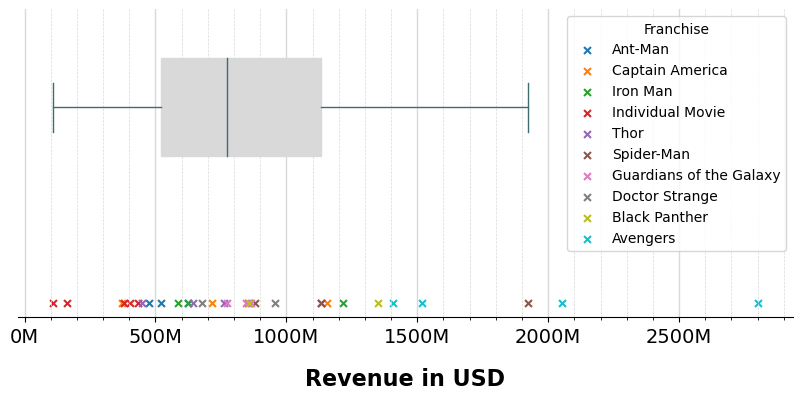

In [22]:
# plotting boxplot of all the movie revenues
plt.figure(figsize=(10, 4))
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.gca().xaxis.set_minor_locator(MultipleLocator(100_000_000))
plt.gca().xaxis.set_major_locator(MultipleLocator(500_000_000))

plt.gca().grid(True, axis='x', which='major', linestyle='-', c='#d9d9d9', lw=1)
plt.gca().grid(True, axis='x', which='minor', linestyle='--', c='#d9d9d9', lw=0.5)


plt.boxplot(df['movie_revenue'], vert=False, showfliers=False, patch_artist=True, boxprops=dict(facecolor='#D9D9D9', color='#D9D9D9'), medianprops=dict(color='#3C6E71'), whiskerprops=dict(color='#3C6E71'), capprops=dict(color='#3C6E71'), flierprops=dict(color='#3C6E71', markeredgecolor='#3C6E71'), widths=0.5)

# getting all film series in the dataset
film_series_names = {
    0: "Individual Movie",
    1: "Captain America",
    2: "Thor",
    3: "Black Panther",
    4: "Ant-Man",
    5: "Spider-Man",
    6: "Avengers",
    7: "Doctor Strange",
    8: "Iron Man",
    9: "Guardians of the Galaxy",
}

film_series = df['film_series'].unique()
for film_serie_i in film_series:
    movies_in_serie = df[df['film_series'] == film_serie_i]
    plt.scatter(movies_in_serie['movie_revenue'], np.zeros(len(movies_in_serie['movie_revenue'])), s=25, marker='x', label=film_series_names[film_serie_i])

plt.xlabel('Revenue in USD', fontdict={'fontsize': 16, 'fontweight': 'bold'}, labelpad=15)
# plt.ylabel('Revenue', fontdict={'fontsize': 16, 'fontweight': 'bold'}, labelpad=15)

# hiding labels
plt.yticks([])

# x axis in million dollars
x_range = np.arange(0, 3000000000, 500000000)
plt.xticks(x_range, [str(int(x/1000000)) + 'M' for x in x_range], fontsize=14)
plt.legend(title='Franchise', loc='upper right', fontsize=10, frameon=True, )
plt.savefig(PLOT_FOLDER + "/revenue_boxplot.png", bbox_inches='tight', dpi=1000)
plt.show()

